# Python Datenvisualisierung 2
## Plotly 3
***
In diesem Notebook wird behandelt:
- Subplots und Mehrfachvisualisierungen
    - Gemeinsame Achsen
    - Faceplots
***

In diesem Kapitel lernst du, wie du mehrere Grafiken in einer Visualisierung kombinieren kannst. Subplots (Teildiagramme) sind besonders nützlich, um verschiedene Aspekte deiner Daten nebeneinander darzustellen oder um komplexe Dashboards zu erstellen.

## 1 Grundlegende Subplots erstellen

### Was sind Subplots?

Subplots sind Anordnungen mehrerer Diagramme in einem einzigen Anzeigebereich. Sie ermöglichen es dir, verschiedene Visualisierungen nebeneinander zu platzieren, um sie direkt vergleichen zu können oder um zusammengehörige Informationen gemeinsam zu präsentieren.

### Wie erstellt man Subplots in Plotly?

In Plotly gibt es zwei Hauptwege, um Subplots zu erstellen:

1. **make_subplots-Funktion**: Eine flexible Methode aus dem `plotly.subplots`-Modul
2. **Facet-Plots in Plotly Express**: Eine einfachere Methode für bestimmte Anwendungsfälle

### Beispiel 1: Einfache Subplots mit make_subplots

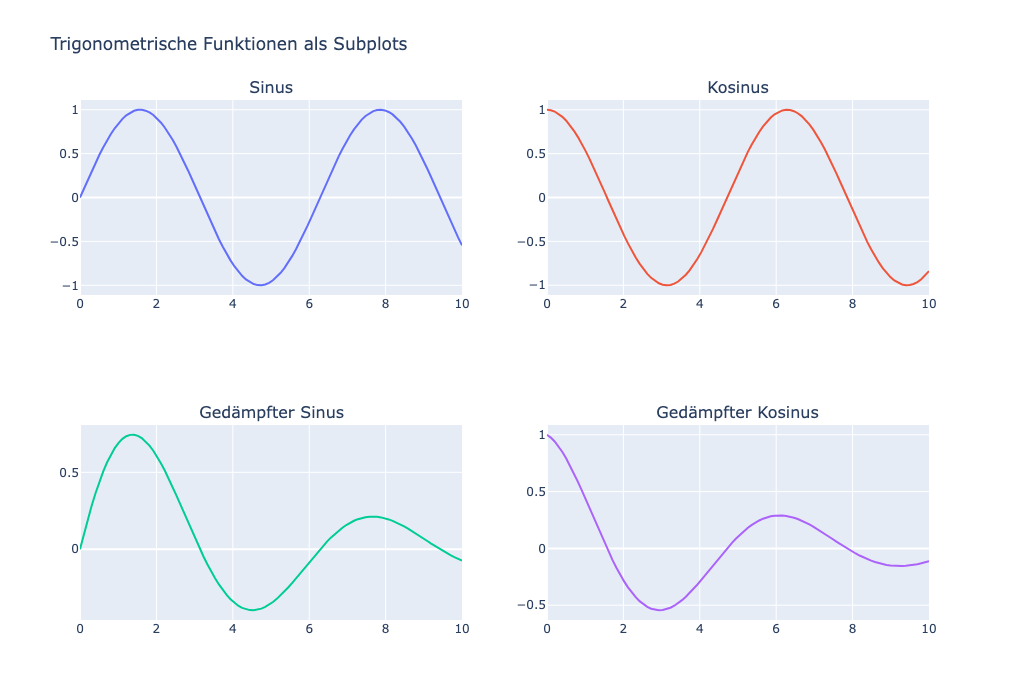

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Daten generieren
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(-0.2*x)
y4 = np.cos(x) * np.exp(-0.2*x)

# 2x2 Subplot-Grid erstellen
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Sinus", "Kosinus", "Gedämpfter Sinus", "Gedämpfter Kosinus")
)

# Traces zu den entsprechenden Subplots hinzufügen
fig.add_trace(
    go.Scatter(x=x, y=y1, mode='lines', name='sin(x)'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x, y=y2, mode='lines', name='cos(x)'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=x, y=y3, mode='lines', name='sin(x)*e^(-0.2x)'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=x, y=y4, mode='lines', name='cos(x)*e^(-0.2x)'),
    row=2, col=2
)

# Layout anpassen
fig.update_layout(
    height=700,
    title_text="Trigonometrische Funktionen als Subplots",
    showlegend=False
)

fig.show()

**Erklärung:**
- Mit `make_subplots` erstellst du ein Raster von Plots mit angegebenen Zeilen und Spalten
- `subplot_titles` setzt Titel für jeden einzelnen Subplot
- Mit `add_trace` fügst du Visualisierungen zu spezifischen Positionen (Zeile, Spalte) hinzu
- Das resultierende Diagramm zeigt vier verschiedene Funktionen in separaten Teildiagrammen

### Beispiel 2: Anpassung der Subplot-Größen

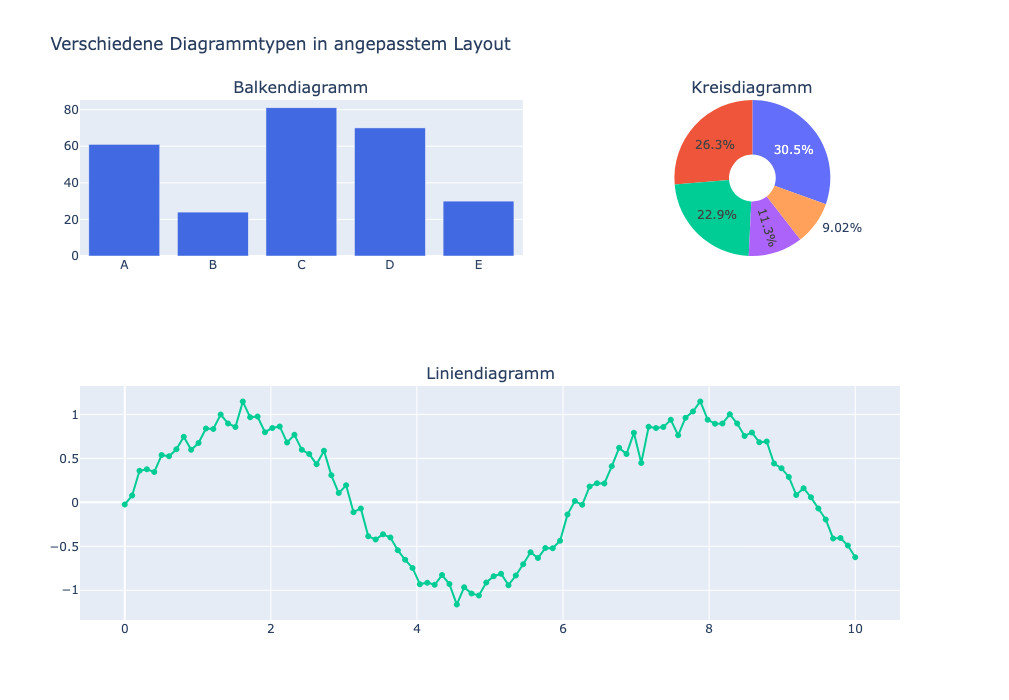

In [2]:
# Daten generieren
np.random.seed(42)
kategorien = ['A', 'B', 'C', 'D', 'E']
werte = np.random.randint(10, 100, size=len(kategorien))

# Subplots mit angepassten Größen erstellen
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Balkendiagramm", "Kreisdiagramm", "Liniendiagramm", "Streudiagramm"),
    specs=[
        [{"type": "xy"}, {"type": "domain"}],  # Erste Zeile: Standard XY-Plot und Domain-Plot (für Pie)
        [{"colspan": 2}, None]                  # Zweite Zeile: Ein Plot über die gesamte Breite
    ],
    column_widths=[0.6, 0.4],  # Unterschiedliche Spaltenbreiten
    row_heights=[0.4, 0.6]     # Unterschiedliche Zeilenhöhen
)

# Balkendiagramm hinzufügen
fig.add_trace(
    go.Bar(x=kategorien, y=werte, marker_color='royalblue'),
    row=1, col=1
)

# Kreisdiagramm hinzufügen (nutzt 'domain' type)
fig.add_trace(
    go.Pie(labels=kategorien, values=werte, hole=0.3),
    row=1, col=2
)

# Liniendiagramm über die ganze Breite hinzufügen
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)
fig.add_trace(
    go.Scatter(x=x, y=y, mode='lines+markers'),
    row=2, col=1  # Wird über die gesamte Breite angezeigt wegen colspan
)

# Layout anpassen
fig.update_layout(
    height=700, 
    title_text="Verschiedene Diagrammtypen in angepasstem Layout",
    showlegend=False
)

fig.show()

**Erklärung:**
- Mit `specs` kannst du die Eigenschaften jedes Subplot-Bereichs definieren
- `{"colspan": 2}` lässt einen Plot über mehrere Spalten hinweg erstrecken
- `{"type": "domain"}` ermöglicht kreisförmige Diagrammtypen wie Pie-Charts
- `column_widths` und `row_heights` steuern die relativen Größen der Zeilen und Spalten

## 2 Gemeinsame Achsen und Sekundärachsen

### Beispiel 1: Subplots mit gemeinsamen Achsen

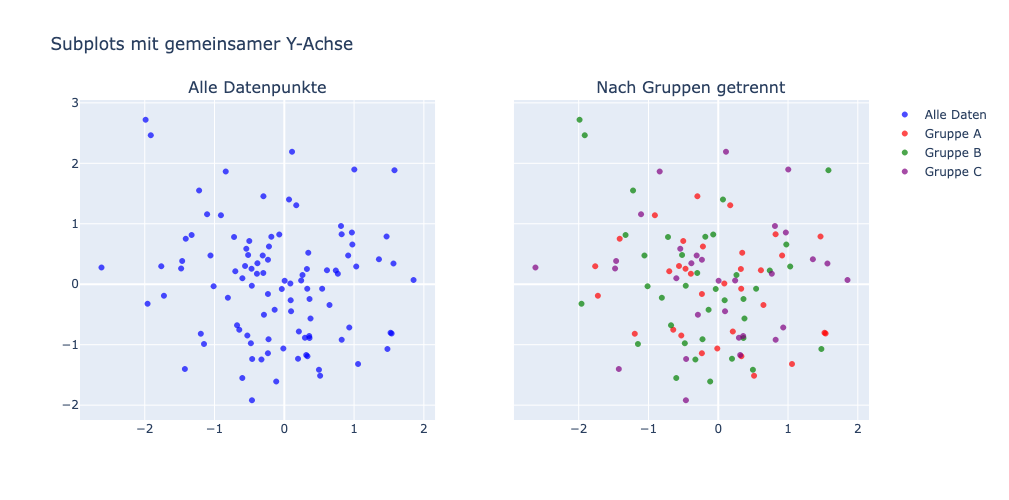

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# Daten generieren
np.random.seed(42)
df = pd.DataFrame({
    'x': np.random.normal(0, 1, 100),
    'y': np.random.normal(0, 1, 100),
    'Gruppe': np.random.choice(['A', 'B', 'C'], 100)
})

# Subplots mit gemeinsamen Achsen erstellen
fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,  # Gemeinsame y-Achse
    subplot_titles=("Alle Datenpunkte", "Nach Gruppen getrennt")
)

# Streudiagramm aller Daten
fig.add_trace(
    go.Scatter(
        x=df['x'],
        y=df['y'],
        mode='markers',
        marker=dict(color='blue', opacity=0.7),
        name='Alle Daten'
    ),
    row=1, col=1
)

# Streudiagramm nach Gruppen getrennt
for gruppe, farbe in zip(['A', 'B', 'C'], ['red', 'green', 'purple']):
    daten = df[df['Gruppe'] == gruppe]
    fig.add_trace(
        go.Scatter(
            x=daten['x'],
            y=daten['y'],
            mode='markers',
            marker=dict(color=farbe, opacity=0.7),
            name=f'Gruppe {gruppe}'
        ),
        row=1, col=2
    )

# Layout anpassen
fig.update_layout(
    height=500,
    width=900,
    title_text="Subplots mit gemeinsamer Y-Achse"
)

fig.show()

**Erklärung:**
- Mit `shared_yaxes=True` werden die y-Achsen der Subplots synchronisiert
- Ebenso gibt es `shared_xaxes=True` für gemeinsame x-Achsen
- Dies ist nützlich, um Werte direkt über verschiedene Subplots hinweg vergleichen zu können

### Beispiel 2: Diagramm mit sekundärer Y-Achse

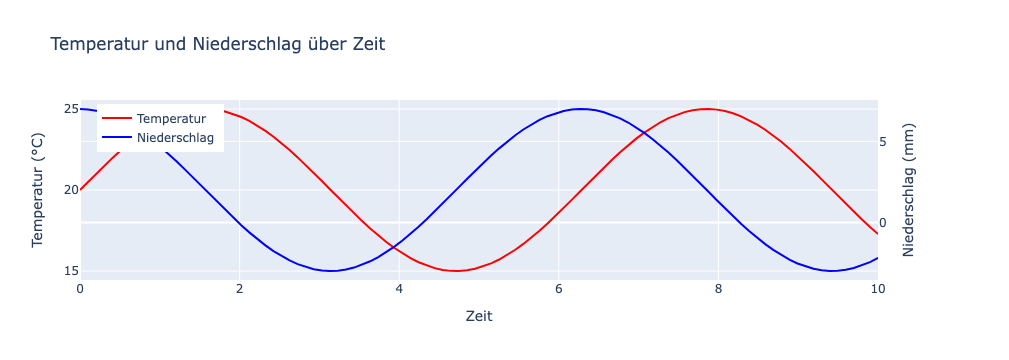

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Daten generieren
x = np.linspace(0, 10, 100)
temperatur = 20 + 5 * np.sin(x)  # Temperatur in °C
niederschlag = 2 + np.cos(x) * 5  # Niederschlag in mm

# Subplot mit sekundärer y-Achse erstellen
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Temperaturkurve auf der primären Y-Achse
fig.add_trace(
    go.Scatter(
        x=x,
        y=temperatur,
        name="Temperatur",
        line=dict(color="red")
    ),
    secondary_y=False  # Primäre y-Achse
)

# Niederschlagskurve auf der sekundären Y-Achse
fig.add_trace(
    go.Scatter(
        x=x,
        y=niederschlag,
        name="Niederschlag",
        line=dict(color="blue")
    ),
    secondary_y=True  # Sekundäre y-Achse
)

# Achsen beschriften
fig.update_xaxes(title_text="Zeit")
fig.update_yaxes(title_text="Temperatur (°C)", secondary_y=False)
fig.update_yaxes(title_text="Niederschlag (mm)", secondary_y=True)

# Layout anpassen
fig.update_layout(
    title_text="Temperatur und Niederschlag über Zeit",
    legend=dict(x=0.02, y=0.98),
    hovermode="x unified"  # Hover zeigt Daten für denselben x-Wert
)

fig.show()

**Erklärung:**
- Mit `specs=[[{"secondary_y": True}]]` erstellst du einen Plot mit sekundärer y-Achse
- `secondary_y=False` oder `True` bestimmt, auf welcher Achse ein Trace dargestellt wird
- `update_yaxes` wird mit dem Parameter `secondary_y` verwendet, um beide Achsen separat zu formatieren
- Dies ist besonders nützlich, um Daten mit unterschiedlichen Einheiten oder Größenordnungen darzustellen

## 3. Facet-Plots mit Plotly Express

### Was sind Facet-Plots?

Facet-Plots (oder "Small Multiples") sind eine spezielle Form von Subplots, bei denen der gleiche Diagrammtyp für verschiedene Teilmengen der Daten wiederholt wird. Dies ist besonders nützlich, um Muster über verschiedene Kategorien hinweg zu vergleichen.

### Beispiel: Facet-Plots nach Kategorien

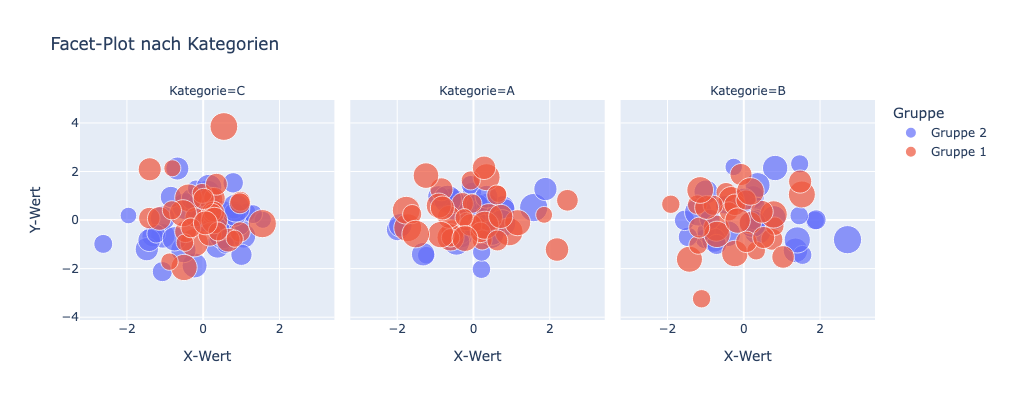

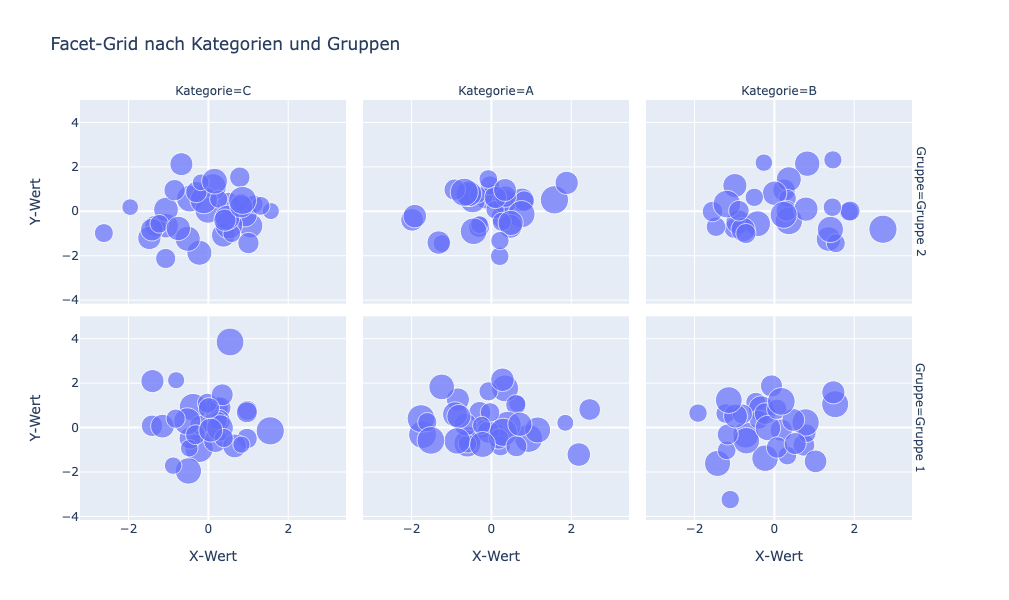

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np

# Daten generieren
np.random.seed(42)
n = 200
kategorien = ['A', 'B', 'C']
gruppen = ['Gruppe 1', 'Gruppe 2']

df = pd.DataFrame({
    'x': np.random.normal(0, 1, n),
    'y': np.random.normal(0, 1, n),
    'Größe': np.random.uniform(5, 15, n),
    'Kategorie': np.random.choice(kategorien, n),
    'Gruppe': np.random.choice(gruppen, n)
})

# Facet-Plot nach Kategorien
fig = px.scatter(
    df, 
    x='x', 
    y='y',
    size='Größe',
    color='Gruppe',
    facet_col='Kategorie',  # Spalten nach Kategorie aufteilen
    title='Facet-Plot nach Kategorien',
    labels={'x': 'X-Wert', 'y': 'Y-Wert', 'Größe': 'Punktgröße'},
    height=400
)

fig.show()

# Facet-Grid (Zeilen und Spalten)
fig = px.scatter(
    df, 
    x='x', 
    y='y',
    size='Größe',
    facet_col='Kategorie',  # Spalten nach Kategorie aufteilen
    facet_row='Gruppe',     # Zeilen nach Gruppe aufteilen
    title='Facet-Grid nach Kategorien und Gruppen',
    labels={'x': 'X-Wert', 'y': 'Y-Wert', 'Größe': 'Punktgröße'},
    height=600
)

fig.show()

**Erklärung:**
- Mit `facet_col` teilst du die Visualisierung in Spalten basierend auf einer kategorialen Variable auf
- Mit `facet_row` teilst du die Visualisierung in Zeilen auf
- Die Kombination beider Parameter erzeugt ein Raster von Plots für alle Kombinationen
- Dies ermöglicht einen schnellen visuellen Vergleich über verschiedene Kategorien hinweg

#### Augaben:

> (a)Erstelle ein Dashboard mit vier verschiedenen Visualisierungen eines simulierten Wetterberichts:
>- Ein Liniendiagramm der Temperaturen über 7 Tage
>- Ein Balkendiagramm der täglichen Niederschlagsmenge
>- Ein Kreisdiagramm der Wetterbedingungen (sonnig, bewölkt, regnerisch)
>- Ein Streudiagramm von Temperatur vs. Luftfeuchtigkeit
>
>Organisiere diese Visualisierungen in einem 2x2-Grid und passe die Größen so an, dass das Liniendiagramm etwas größer ist als die anderen.

In [ ]:
# Deine Lösung:




#### Lösung:

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Wetterdaten für eine Woche simulieren
np.random.seed(42)
tage = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
temperatur = np.random.normal(20, 3, 7)  # Temperaturen um 20°C
niederschlag = np.random.exponential(2, 7)  # Niederschlag mit Exponentialverteilung
luftfeuchtigkeit = np.random.normal(60, 10, 7)  # Luftfeuchtigkeit um 60%
bedingungen = np.random.choice(['Sonnig', 'Bewölkt', 'Regnerisch'], 7, p=[0.5, 0.3, 0.2])

# Zählen der Wetterbedingungen für das Kreisdiagramm
bedingungen_count = pd.Series(bedingungen).value_counts()

# Subplot-Grid erstellen mit angepassten Größen
fig = make_subplots(
    rows=2, cols=2,
    specs=[
        [{"colspan": 2}, None],  # Erste Zeile: Ein Plot über die gesamte Breite
        [{"type": "xy"}, {"type": "domain"}]  # Zweite Zeile: Standard XY-Plot und Domain-Plot (für Pie)
    ],
    subplot_titles=("Temperaturverlauf", "Niederschlag", "Temperatur vs. Luftfeuchtigkeit")
)

# 1. Liniendiagramm der Temperaturen (größer, über gesamte Breite)
fig.add_trace(
    go.Scatter(
        x=tage,
        y=temperatur,
        mode='lines+markers',
        name="Temperatur",
        line=dict(color="red", width=2),
        marker=dict(size=8)
    ),
    row=1, col=1  # Erste Zeile, erste Spalte (colspan=2)
)

# 2. Balkendiagramm des Niederschlags
fig.add_trace(
    go.Bar(
        x=tage,
        y=niederschlag,
        name="Niederschlag",
        marker_color="blue"
    ),
    row=2, col=1  # Zweite Zeile, erste Spalte
)

# 3. Streudiagramm: Temperatur vs. Luftfeuchtigkeit
fig.add_trace(
    go.Scatter(
        x=temperatur,
        y=luftfeuchtigkeit,
        mode='markers',
        marker=dict(
            size=12,
            color=temperatur,
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Temp. (°C)")
        ),
        text=tage,
        name="Temp. vs. Luftfeuchte"
    ),
    row=2, col=1  # Zweite Zeile, erste Spalte
)

# 4. Kreisdiagramm der Wetterbedingungen
fig.add_trace(
    go.Pie(
        labels=bedingungen_count.index,
        values=bedingungen_count.values,
        hole=0.3,
        name="Wetterbedingungen"
    ),
    row=2, col=2  # Zweite Zeile, zweite Spalte
)

# Layout anpassen
fig.update_layout(
    title_text="Wetterbericht Dashboard",
    height=800,
    showlegend=False
)

# Achsenbeschriftungen anpassen
fig.update_yaxes(title_text="Temperatur (°C)", row=1, col=1)
fig.update_yaxes(title_text="Niederschlag (mm)", row=2, col=1)
fig.update_xaxes(title_text="Temperatur (°C)", row=2, col=1)
fig.update_yaxes(title_text="Luftfeuchtigkeit (%)", row=2, col=1)

# Kreisdiagramm-Titel hinzufügen (da subplot_titles nicht für alle funktioniert)
fig.add_annotation(
    x=0.85, y=0.15,
    xref="paper", yref="paper",
    text="Wetterbedingungen",
    showarrow=False,
    font=dict(size=14)
)

fig.show()

**Erklärung der Lösung:**
- Wir erstellen ein angepasstes Subplot-Grid mit einer großen Visualisierung oben und zwei kleineren unten
- Das Temperatur-Liniendiagramm nimmt die gesamte obere Zeile ein durch `colspan=2`
- Für das Kreisdiagramm verwenden wir den Typ `domain`
- Jede Visualisierung hat angepasste Achsenbeschriftungen und Farben
- Wir fügen eine zusätzliche Annotation für den Kreisdiagramm-Titel hinzu

## Zusammenfassung

In diesem Kapitel hast du gelernt, wie du multiple Visualisierungen in Plotly erstellen kannst. Die wichtigsten Punkte waren:

- Mit `make_subplots` kannst du flexible Raster von Plots erstellen
- Die `specs`-Parameter ermöglichen komplexe Layouts mit verschiedenen Größen und Typen
- Gemeinsame Achsen helfen beim direkten Vergleich von Daten
- Sekundärachsen sind nützlich für Daten mit unterschiedlichen Maßeinheiten
- Facet-Plots in Plotly Express ermöglichen eine schnelle Aufteilung nach Kategorien

Diese Techniken sind besonders wertvoll für die Erstellung von Dashboards und für die vergleichende Analyse verschiedener Datensätze oder Aspekte deiner Daten.